In [1]:
# !git clone -b master https://github.com/StefanoNasini/Country-by-country-2022-2023-international-relationships
# !cd Country-by-country-2022-2023-international-relationships

In [2]:
import json
import os

root = os.getcwd()
root = os.path.dirname(root)
import pandas as pd

os.chdir(os.path.join(root, "src", "utils"))
from aka import tri2name, tri2aka

covotes = pd.read_csv(os.path.join(root, "constructed_network", "covotes.csv"), index_col=0)
UN_countries = covotes.columns
# contravotes = pd.read_csv(os.path.join(root, "network_data", "contravotes.csv"), index_col=0)


# prefriendshipgraph = pd.read_csv(os.path.join(root, "network_data", "pre_friends_network_75.csv"), index_col=0)
# preenemyshipgraph = pd.read_csv(os.path.join(root, "network_data", "pre_enemies_network_75.csv"), index_col=0)
# alliancegraph = pd.read_csv(os.path.join(root, "network_data", "alliances_network.csv"), index_col=0)
# friendshipgraph = pd.read_csv(os.path.join(root, "network_data", "friends_network_75.csv"), index_col=0)
# enemyshipgraph  = pd.read_csv(os.path.join(root, "network_data", "enemies_network_75.csv"), index_col=0)


# pca_prefriends = pd.read_csv(os.path.join(root, "network_data", "pca_prefriends.csv"), index_col=0)
# pca_preenemies = pd.read_csv(os.path.join(root, "network_data", "pca_preenemies.csv"), index_col=0)
# pca_friends = pd.read_csv(os.path.join(root, "network_data", "pca_friends.csv"), index_col=0)
# pca_enemies  = pd.read_csv(os.path.join(root, "network_data", "pca_enemies.csv"), index_col=0)

['Y AFGHANISTAN\n', 'A ALBANIA\n', 'Y ALGERIA\n', 'A ANDORRA\n', 'Y ANGOLA\n', 'Y ANTIGUA AND BARBUDA\n', 'Y ARGENTINA\n', 'A ARMENIA\n', 'N AUSTRALIA\n', 'N AUSTRIA\n']


In [3]:
# wto = pd.read_csv(os.path.join(root, "WTO_trade_data", "WTO_trade_data2.csv"), encoding='latin-1')
wto = pd.read_csv(os.path.join(root, "raw_data", "WTO_trade_data", "bilateral.csv"), encoding='latin-1')

In [4]:
wto.loc[20]

Reporting Economy ISO3A Code            ALB
Partner Economy ISO3A Code              ATG
Year                                   2016
Value                           1745.726377
Name: 20, dtype: object

In [5]:
# set(wto["Partner Economy"])

In [6]:

from_countries = wto["Reporting Economy ISO3A Code"]
# countries = wto["Reporting Economy"]
to_countries = wto["Partner Economy ISO3A Code"]

In [7]:
from_to_countries = set(from_countries).union(to_countries)

In [8]:
from_to_countries = sorted(c for c in from_to_countries if not pd.isna(c))

In [9]:
from_to_countries

['AFG',
 'AGO',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CHT',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EEC',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MDA',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',


In [10]:
bilateral = pd.DataFrame(index=from_to_countries, columns = from_to_countries)

In [11]:
wto.loc[100]

Reporting Economy ISO3A Code          ALB
Partner Economy ISO3A Code            AUT
Year                                 2017
Value                           1117265.1
Name: 100, dtype: object

In [12]:
# try python loop. if too slow, then try other method
def process_row(row=wto.loc[100]):
    therefrom = row['Reporting Economy ISO3A Code']
    thereto = row['Partner Economy ISO3A Code']
    value = row['Value']
    if therefrom in bilateral.index and thereto in bilateral.columns:
        bilateral.loc[therefrom, thereto] = value


In [13]:
# pivot_df = wto.pivot_table(index='Reporting Economy', columns='Partner Economy', values='Value', aggfunc='sum', fill_value=0)
# pivot_df = wto.pivot_table(index='Reporting Economy ISO3A Code', columns='Partner Economy ISO3A Code', values='Value', aggfunc='sum', fill_value=0)

In [14]:
pivot_df2 = wto.pivot_table(index=["Reporting Economy ISO3A Code", "Partner Economy ISO3A Code", "Year"], values="Value", aggfunc='sum', fill_value=0)

In [15]:
pivot_df = pivot_df2.pivot_table(index="Reporting Economy ISO3A Code", columns=["Partner Economy ISO3A Code"], values="Value", aggfunc='mean', fill_value=0)

In [16]:
# missing countries
# for c in set(UN_countries).difference(set(pivot_df.index)):
#     print(tri2name[c])

In [17]:
with open(os.path.join(root, "raw_data", "GDP_data", "GDP_data.json")) as f:
    GDP = eval(f.read())

In [18]:
for c in pivot_df.columns:
    try:
        GDP[c]
    except KeyError:
        print(c)

CHT
EEC
MMR
ROM
VAT


In [19]:
pivot_df.drop("VAT", axis=1, inplace=True) if "VAT" in pivot_df.columns else None
pivot_df.drop("EEC", axis=1, inplace=True) if "EEC" in pivot_df.columns else None
pivot_df.drop("CHT", axis=1, inplace=True) if "CHT" in pivot_df.columns else None

pivot_df.drop("VAT", axis=0, inplace=True) if "VAT" in pivot_df.index else None
pivot_df.drop("EEC", axis=0, inplace=True) if "EEC" in pivot_df.index else None
pivot_df.drop("CHT", axis=0, inplace=True) if "CHT" in pivot_df.index else None


In [20]:
pivot_df.rename({"MMR":"MYR", "ROM":"ROU"}, axis=0, inplace=True)
pivot_df.rename({"MMR":"MYR", "ROM":"ROU"}, axis=1, inplace=True)

In [21]:
total = set(pivot_df.columns)
given = set(pivot_df.index)
unknown = total.difference(given)

In [22]:
len(total), len(given), len(unknown)

(186, 102, 84)

In [23]:
B = sum(GDP[j] for j in unknown)
A = dict()
for i in total:
    A[i] = GDP[i]
    
h = dict()
for i in given:
    h[i] = sum(pivot_df.loc[i, :])

v = dict()
for j in total:
    v[j] = sum(pivot_df.loc[i, j] for i in given)

In [24]:
K = 1/len(total)

In [25]:
k = dict()
for i in given:
    k[i] = (h[i]-v[i]) / B

In [26]:
for i in unknown:
    k[i] = 1/B*(GDP[i]*sum(k[j] for j in given) + GDP[i]*K - v[i])

In [27]:
total_GDP = sum(GDP[j] for j in pivot_df.columns)
T = total_GDP
T

155767704

In [28]:
t = pivot_df.sum().sum() / (T- sum(GDP[c] for c in pivot_df.columns if c not in pivot_df.index))

In [29]:
countries_inferred = set(pivot_df.columns).difference(set(pivot_df.index))

In [30]:
y = dict(zip(countries_inferred, countries_inferred))

In [31]:
for c in countries_inferred:
    Bi = (pivot_df.loc[:, c]).sum()
    y[c] = (Bi + GDP[c]*t)/T 

In [32]:
for ci in countries_inferred:
    for cj in pivot_df.columns:
        pivot_df.loc[ci, cj] = y[ci]*GDP[cj]

In [33]:
pivot_df.to_csv(os.path.join(root, "constructed_network", "trade_flow.csv"))

In [34]:
for c in UN_countries:
    if c not in pivot_df.columns:
        print(tri2name[c])

eritrea
micronesia (federated states of)
kiribati
monaco
marshall islands
nauru
palau
democratic people's republic of korea
san marino
tuvalu


In [35]:
(pivot_df==0).sum().sum()

2320

In [36]:
wto

,Reporting Economy ISO3A Code,Partner Economy ISO3A Code,Year,Value
0,ALB,AFG,2016,555.675171
1,ALB,AFG,2017,239.071228
2,ALB,AFG,2017,1.181333
3,ALB,DZA,2017,28749.047720
4,ALB,DZA,2016,1598.313252
...,...,...,...,...
693253,EEC,ZMB,2020,201358.894200
693254,EEC,ZMB,2019,617331.037700
693255,EEC,ZMB,2018,539405.517600
693256,EEC,ZMB,2016,228817.436000


In [37]:
# make sure the trigraphs are consistent with ISO
# ISO3A = dict(zip(wto["Partner Economy ISO3A Code"], wto["Partner Economy"]))

In [38]:
# for tri, cname in ISO3A.items():
#     try:
#         print(f"ISO3A tri={tri}\nISO3A name  ={cname}\nmy trigraph ={tri2name[tri]}")
#     except KeyError:
#         print(f"{tri} is not found in my trigraphs----------------------------------")

In [39]:
## Result :
# CHT chinese taipei not present in UN country
# ROM romania in ISO code but ROU in my trigraph  => c
# EEC europeans union in ISO code but not in UN country

In [40]:
# make a percentage-based pivot table.
# Each row is 
pivot_ratio_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

Text(0.5, 1.0, 'Contravotes with Percentiles')

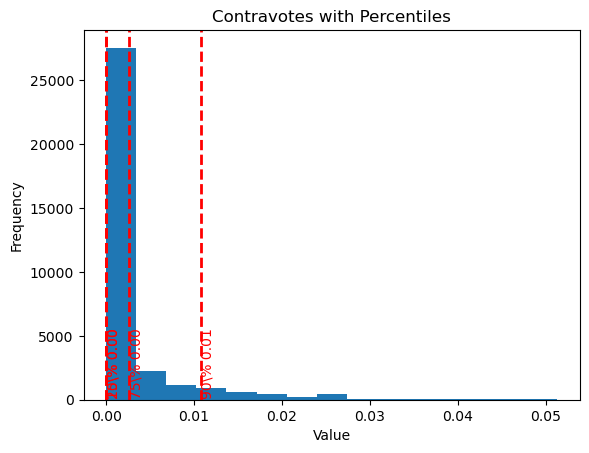

In [41]:
import matplotlib.pyplot as plt
import numpy as np

percentiles_to_draw = [10, 25, 75, 90]

percentiles = np.percentile(pivot_ratio_df.to_numpy().flatten(), percentiles_to_draw)
pivot_percentiles = dict(zip(percentiles_to_draw, percentiles))


# Add vertical lines and annotations for percentiles
for i, p in enumerate(percentiles):
    plt.axvline(p, color='r', linestyle='--', linewidth=2)
    plt.text(p, 50, f'{percentiles_to_draw[i]}\% {p:.2f}', color='r', rotation=90, verticalalignment='bottom')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')

show_up_to_percentile= 98

# plot histogram up to certain percentile
data = pivot_ratio_df.to_numpy().flatten()
filtered_data = data[data <= np.percentile(data, show_up_to_percentile)]
plt.hist(filtered_data, bins=15)

plt.title('Contravotes with Percentiles')


In [42]:
pivot_ratio_df = pivot_ratio_df.rename_axis(columns={"ROM":"ROU"}, index={"ROM":"ROU"})

In [43]:
threshold_percent = 90
threshold = np.percentile(data, threshold_percent)
trade_over_90 = pivot_ratio_df.applymap(lambda x: 1 if x>=threshold else 0)

threshold_percent = 80
threshold = np.percentile(data, threshold_percent)
trade_over_80 = pivot_ratio_df.applymap(lambda x: 1 if x>=threshold else 0)


threshold_percent = 75
threshold = np.percentile(data, threshold_percent)
trade_over_75 = pivot_ratio_df.applymap(lambda x: 1 if x>=threshold else 0)




threshold_percent = 25
threshold = np.percentile(data, threshold_percent)
trade_under_25 = pivot_ratio_df.applymap(lambda x: 1 if x>threshold else 0)

threshold_percent = 20
threshold = np.percentile(data, threshold_percent)
trade_under_20 = pivot_ratio_df.applymap(lambda x: 1 if x>threshold else 0)


threshold_percent = 10
threshold = np.percentile(data, threshold_percent)
trade_under_10 = pivot_ratio_df.applymap(lambda x: 1 if x>threshold else 0)


(array([ 4.,  5.,  6., 15., 29., 17., 19.,  3.,  3., 85.]),
 array([15. , 19.5, 24. , 28.5, 33. , 37.5, 42. , 46.5, 51. , 55.5, 60. ]),
 <BarContainer object of 10 artists>)

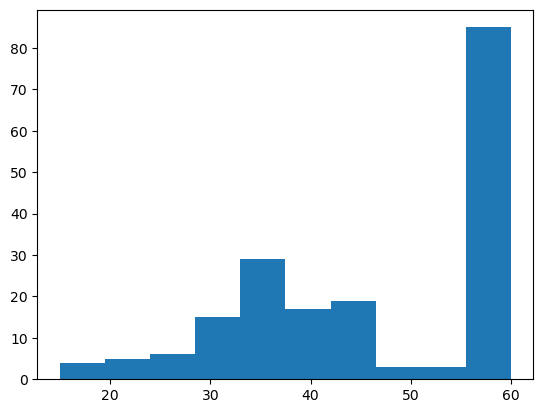

In [44]:
# how many partnar countries does each reporting country has?
plt.hist(trade_over_75.sum(axis=1))
# CCL : about 15-20 most likely. looks like noramlly distributed.

In [45]:
trade_over_90.to_csv(os.path.join(root, "constructed_network", "trade_over90.csv"))
trade_over_80.to_csv(os.path.join(root, "constructed_network", "trade_over80.csv"))
trade_over_75.to_csv(os.path.join(root, "constructed_network", "trade_over75.csv"))

trade_under_25.to_csv(os.path.join(root,"constructed_network",  "trade_under25.csv"))
trade_under_20.to_csv(os.path.join(root,"constructed_network",  "trade_under20.csv"))
trade_under_10.to_csv(os.path.join(root,"constructed_network",  "trade_under10.csv"))



In [46]:
(pivot_df == 0).sum().sum()

2320